In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [4]:
print("duplicate",df.duplicated().sum())

duplicate 0


In [ ]:
import matplotlib.pyplot as plt

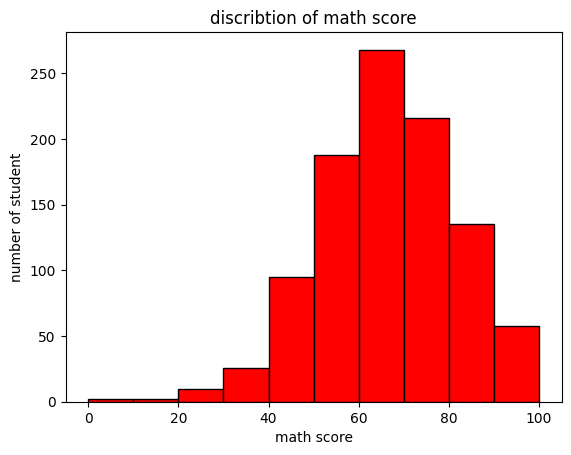

In [ ]:
plt.hist(df['math score'],bins=10,color='red',edgecolor='black')
plt.title("discribtion of math score")
plt.xlabel("math score")
plt.ylabel('number of student')
plt.show()

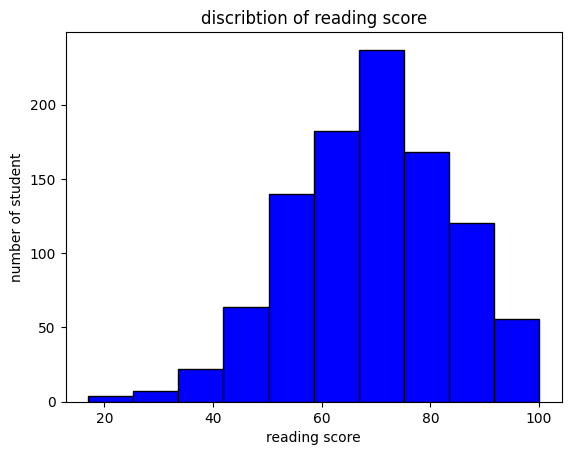

In [ ]:
plt.hist(df['reading score'],bins=10,color='blue',edgecolor='black')
plt.title('discribtion of reading score')
plt.xlabel('reading score')
plt.ylabel('number of student')
plt.show()

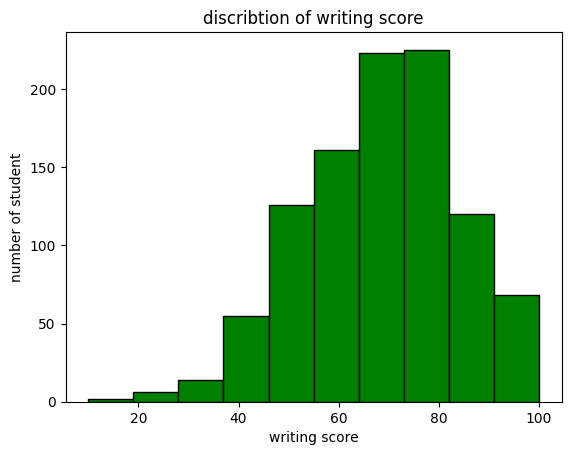

In [ ]:
#histogramme
plt.hist(df['writing score'],bins=10,color='green',edgecolor='black')
plt.title('discribtion of writing score')
plt.xlabel('writing score')
plt.ylabel('number of student')
plt.show()

In [5]:
#score by genre
math_score_by_gender=df.groupby('gender')['math score'].mean()
print(math_score_by_gender)

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64


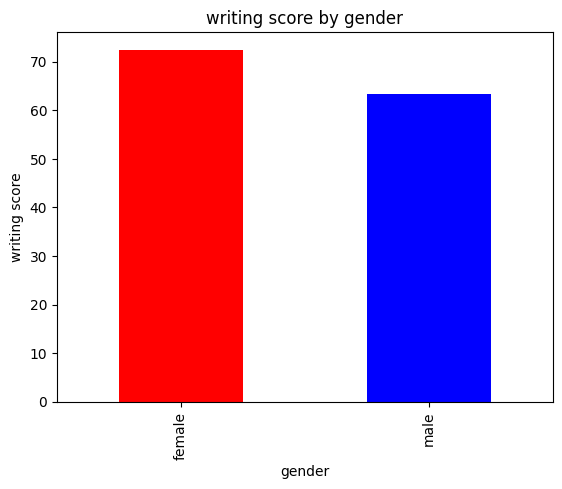

In [ ]:
writing_score=df.groupby('gender')['writing score'].mean()
writing_score.plot(kind='bar',color=['red','blue'])
plt.title('writing score by gender')
plt.xlabel('gender')
plt.ylabel('writing score')
plt.show()

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


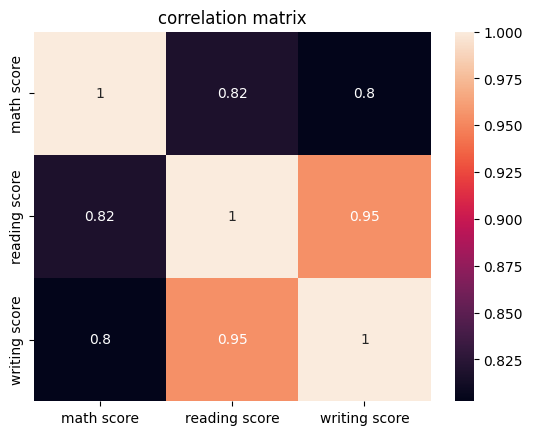

In [ ]:
#correlation matrix
import seaborn as sns
print(df[['math score','reading score','writing score']].corr())
sns.heatmap(df[['math score','reading score','writing score']].corr(),annot=True)
plt.title('correlation matrix')
plt.show()

In [ ]:
#machine learning need only numbers
df_encoding=pd.get_dummies(df,drop_first=True,dtype=int)
print(df_encoding.head())

   math score  reading score  writing score  gender_male  \
0          72             72             74            0   
1          69             90             88            0   
2          90             95             93            0   
3          47             57             44            1   
4          76             78             75            1   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                       1                       0                       0   
1                       0                       1                       0   
2                       1                       0                       0   
3                       0                       0                       0   
4                       0                       1                       0   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                       0                                              1   
1                       

In [ ]:
#separation de features
x=df_encoding.drop('writing score',axis=1) #toutes les colonnes sauf math score
y=df_encoding["writing score"] #la colonner a prédire

In [ ]:
#Séparer les données en entraînement et test 80% pour train and 20% for test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Créer et entraîner un modèle (par ex: régression linéaire)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#faire des prédictions sur les données de test
y_pred=model.predict(x_test)

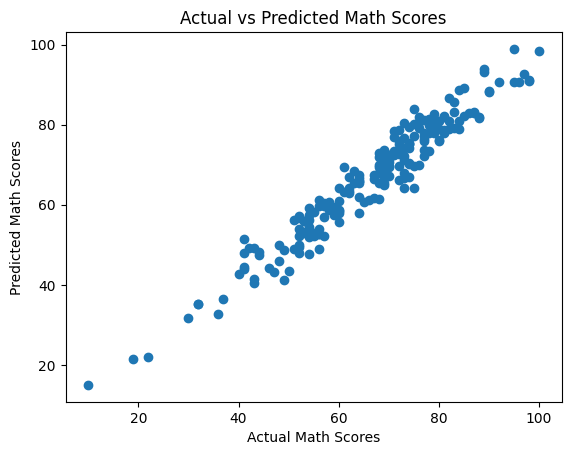

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()
